In [1]:
# import plotly
import pandas as pd
from datetime import datetime
# import labella
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
import plotly.express as px
import seaborn as sns
# plt.style.use('default')
plt.style.use(r"C:\Users\chee8\Desktop\RW_visualization.mplstyle")

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
current_palette = sns.color_palette("Paired")
current_palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [4]:
# load data
data = pd.read_excel('../../Wanning of VE.xlsx')
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').\
str.replace('(', '').str.replace(')', '')
data = data.replace('X', np.nan)

## Efficacy waning plot grouped by variant

In [5]:
variant = np.unique(data.variant)
VEType = np.unique(data.ve_type)

In [6]:
def VEWaningPlot(data, variant, VEType):
    colorIndex = 0
    data = data[(data.variant == variant) & (data.ve_type == VEType)]
    if len(data) > 0:
        plt.figure()
        efficacy = data[data.columns[[1, 4, 7, 10, 13, 16]]]
        efiicacyLower = data[data.columns[np.add([1, 4, 7, 10, 13, 16], 1)]]
        efiicacyUpper = data[data.columns[np.add([1, 4, 7, 10, 13, 16], 2)]]
        for i in range(len(efficacy)):
            plt.plot(range(len(efficacy.columns)), efficacy.iloc[i].values, \
                color=current_palette[colorIndex+1], \
                label=data['vaccine/ve_after_number_of_days_post_2nd_dose_of_vaccine'].iloc[i])
            plt.fill_between(range(len(efficacy.columns)), efiicacyLower.iloc[i].values, \
                efiicacyUpper.iloc[i].values, \
                alpha=0.2, color=current_palette[colorIndex])                
            colorIndex += 2
        plt.xlabel('Time (days)')
        plt.xticks(range(len(efficacy.columns)), efficacy.columns)
        plt.ylabel('Efficacy (%)')
        plt.title(f'Variant {variant} & VE type {VEType}')
        plt.legend(loc='best')

        if variant == 'Alpha/Delta':
            variant = 'Alpha_Delta'
        if variant == 'Beta/Delta':
            variant = 'Beta_Delta'
        # plt.savefig('RW2022_%s_%s.png'%(variant,VEType))
    else:
        print(f'Variant {variant} & VE type {VEType}: No data')

Variant Alpha & VE type Disease: No data
Variant Alpha & VE type Infection: No data
Variant Alpha & VE type Not specified: No data
Variant Alpha/Delta & VE type Not specified: No data
Variant Alpha/Delta & VE type Symptotic disease: No data
Variant Beta/Delta & VE type Death: No data
Variant Beta/Delta & VE type Disease: No data
Variant Beta/Delta & VE type Hospitalization: No data
Variant Beta/Delta & VE type Not specified: No data
Variant Beta/Delta & VE type Symptotic disease: No data
Variant Delta & VE type Death: No data
Variant Delta & VE type Hospitalization: No data
Variant Delta & VE type Symptotic disease: No data
Variant Multiple variants & VE type Death: No data
Variant Multiple variants & VE type Disease: No data
Variant Multiple variants & VE type Not specified: No data
Variant Multiple variants & VE type Symptotic disease: No data


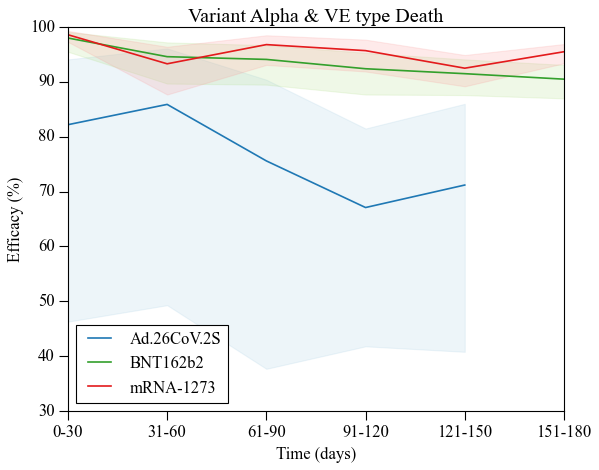

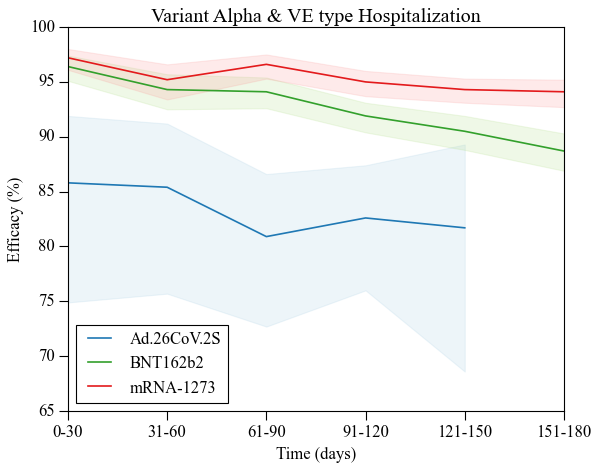

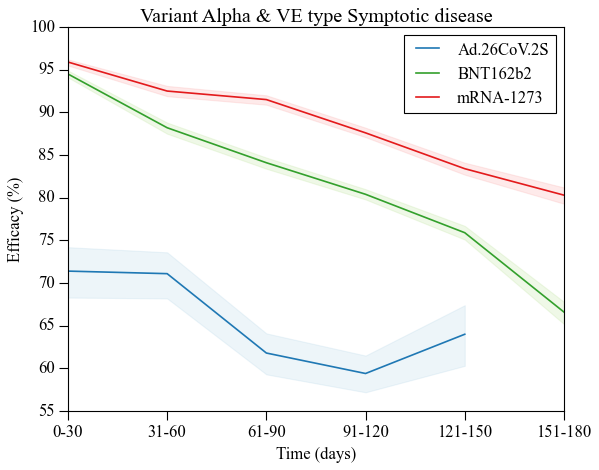

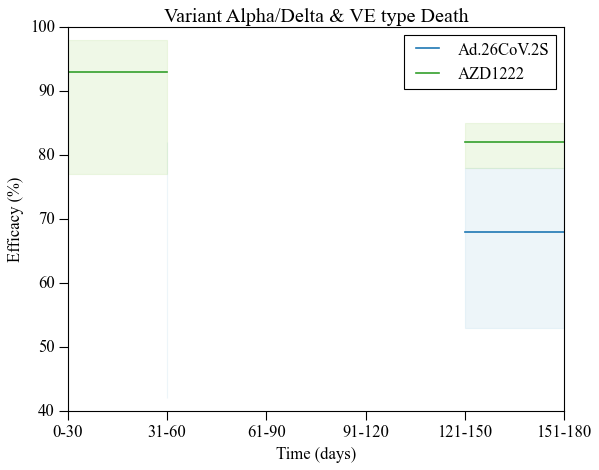

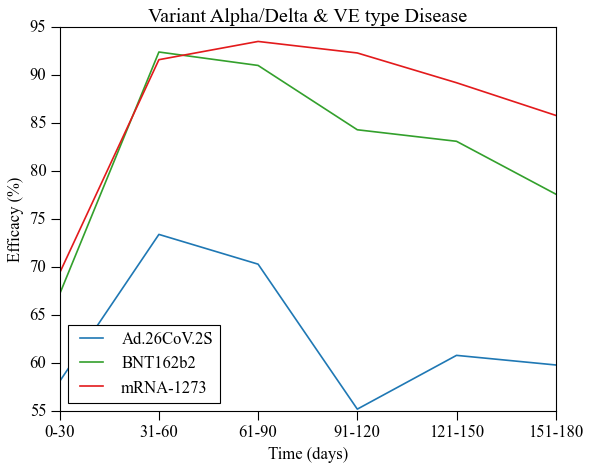

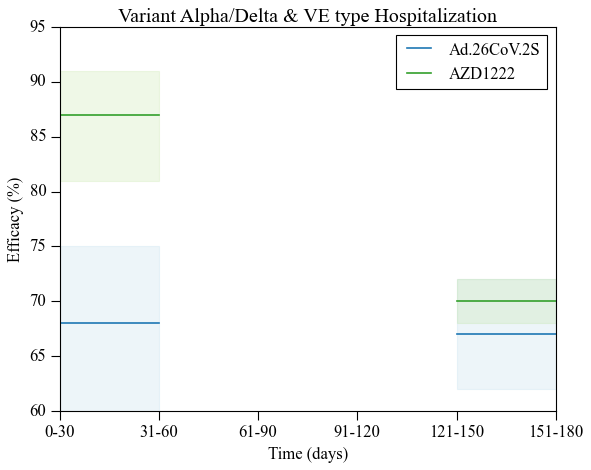

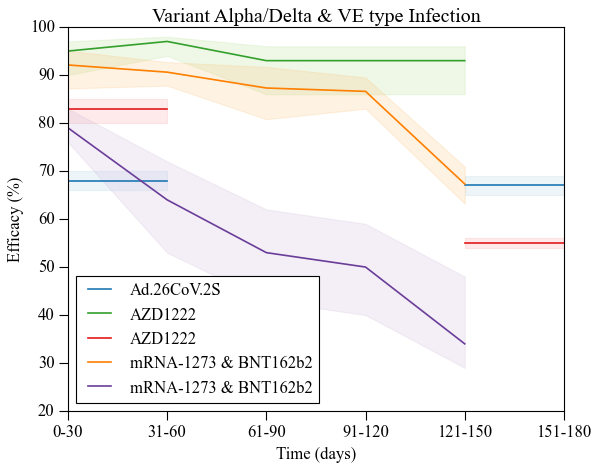

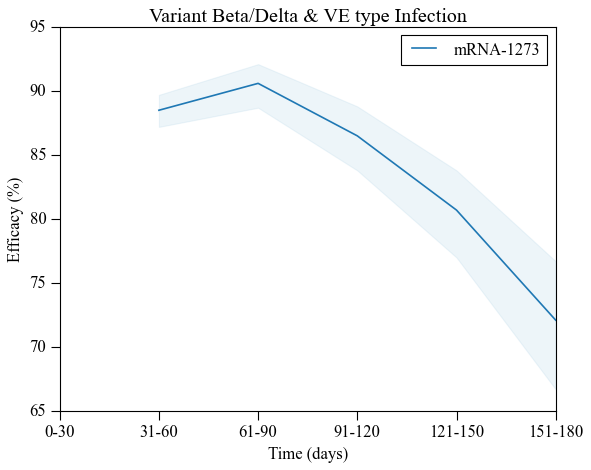

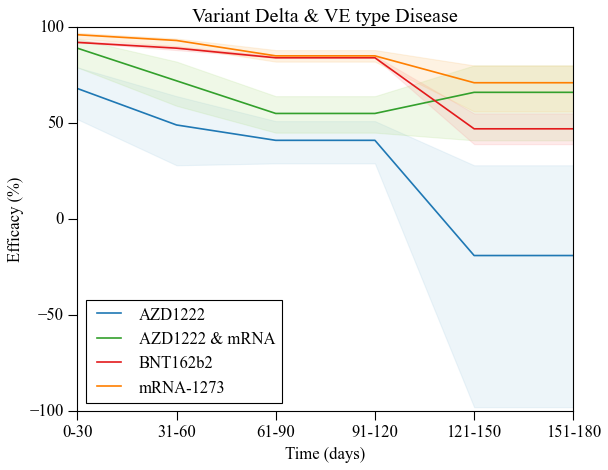

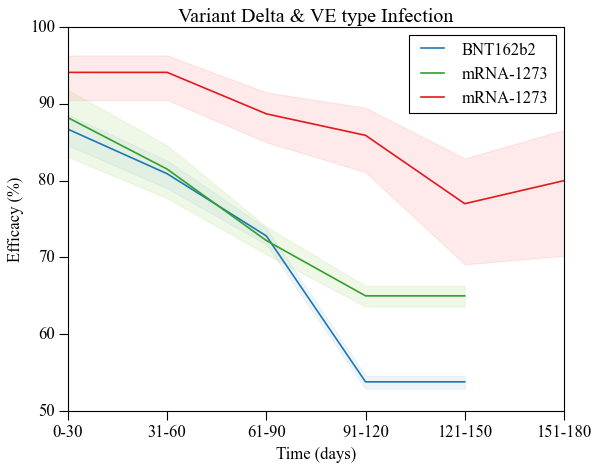

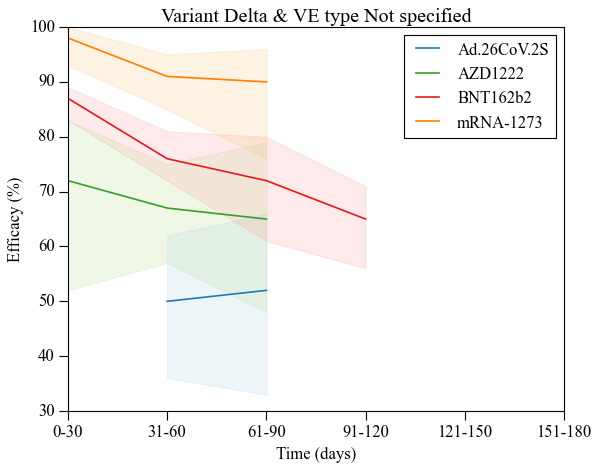

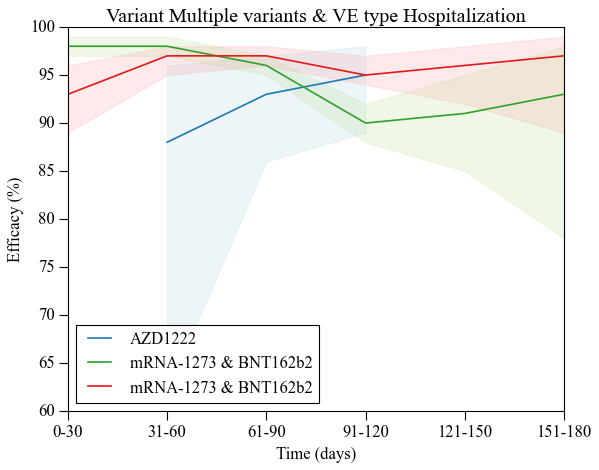

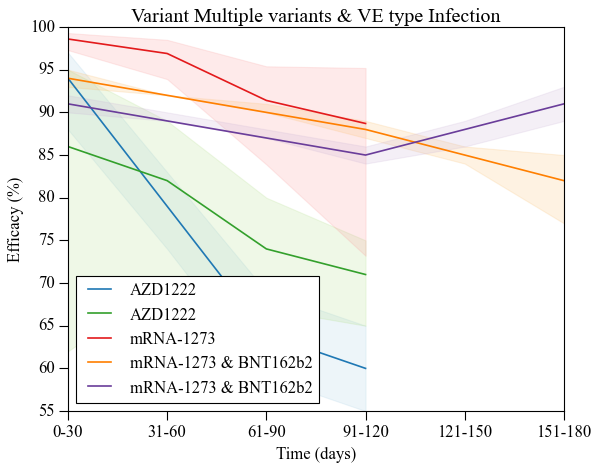

In [7]:
for i in range(len(variant)):
    for j in range(len(VEType)):
        VEWaningPlot(data, variant[i], VEType[j])

In [8]:
number_participant_vaccine = vaccineDetail['no_of_participants_in_vaccine_group'].replace('X', np.NaN)
number_participant_placebo = vaccineDetail['no_of_participants_in_placebo_groupcontrol_group'].replace('X', np.NaN)
number_infected_vaccine = vaccineDetail['no_of_infected_in_vaccine_group'].replace('X', np.NaN)
number_infected_placebo = vaccineDetail['no_of_infected_in_placebo_group'].replace('X', np.NaN)

efficacy_vaccine = number_infected_vaccine*100/number_participant_vaccine
efficacy_placebo = number_infected_placebo*100/number_participant_placebo

NameError: name 'vaccineDetail' is not defined

In [ ]:
palette = sb.color_palette('Set1', n_colors=len(vaccineName.unique())+2)
palette = palette[0:5] + palette[6:14] + palette[15::]

In [ ]:
vaccineNameUnique = np.sort(vaccineName.unique())
index = np.array([0])
indexTemp = 0
plt.figure(figsize=(10,len(vaccineName)*0.35))
for i in vaccineNameUnique:
    vaccineGroup = vaccineDetail[vaccineDetail.vaccine == i]
    efficacyGroup = vaccineGroup['efficacy_in_%']
    efiicacyLowerGroup = vaccineGroup['lower']
    efiicacyUpperGroup = vaccineGroup['upper']

    # Replace 'X' in the lower and upper bound to the efficacy value
    efiicacyLowerGroup[efiicacyLowerGroup.index[efiicacyLowerGroup == 'X'].tolist()] = \
        efficacyGroup[efiicacyLowerGroup.index[efiicacyLowerGroup == 'X'].tolist()]
    efiicacyUpperGroup[efiicacyUpperGroup.index[efiicacyUpperGroup == 'X'].tolist()] = \
        efficacyGroup[efiicacyUpperGroup.index[efiicacyUpperGroup == 'X'].tolist()]

    # To numpy
    efficacyGroup = efficacyGroup.to_numpy()
    efiicacyLowerGroup = efiicacyLowerGroup.to_numpy()
    efiicacyUpperGroup = efiicacyUpperGroup.to_numpy()

    # Plot
    for j in range(len(efficacyGroup)):
        plt.errorbar(efficacyGroup[j], j+index[-1], xerr=np.array([[efficacyGroup[j]-efiicacyLowerGroup[j], \
            efiicacyUpperGroup[j]-efficacyGroup[j]]]).T, fmt='o', color=palette[len(index)-1])
        indexTemp += 1
    index = np.append(index, indexTemp)

plt.plot([30, 30], [-1, 40], 'k--')
plt.plot([50, 50], [-1, 40], 'k--')
plt.xlabel('Efficacy (%)', fontsize=20)
plt.yticks(index[0:-1], vaccineNameUnique, fontsize=20)
plt.xticks(fontsize=20)
plt.ylim([-1, indexTemp])
plt.gca().invert_yaxis()
plt.gca().yaxis.grid()
plt.savefig('RW2021_Efficacy_compare.pdf', format='pdf', bbox_inches = 'tight')

## Vaccine efficacy vs different variants

In [ ]:
vaccineVariantTable = pd.read_excel('../VaccinenVariant.xlsx')
vaccineVariantTable.columns = vaccineVariantTable.columns.str.strip().str.lower().str.replace(' ', '_').\
str.replace('(', '').str.replace(')', '')

In [ ]:
vaccineVariantTable

In [ ]:
vaccineVariantTableTemp.vaccine_efficacy

In [ ]:
# Delta
variantType = np.sort(vaccineVariantTable.variant.unique())
for k in variantType:
    print(k)
    vaccineVariantTableTemp = vaccineVariantTable[vaccineVariantTable.variant == k]
    vaccineNameUnique = np.sort(vaccineVariantTableTemp.vaccine.unique())
    index = np.array([0])
    indexTemp = 0
    plt.figure(figsize=(10,len(vaccineVariantTableTemp.vaccine)*0.35)) # Forcing bars distance the same
    for i in vaccineNameUnique: # Vaccine
        vaccineGroup = vaccineVariantTableTemp[vaccineVariantTableTemp.vaccine == i]
        efficacyGroup = vaccineGroup['vaccine_efficacy']
        efiicacyLowerGroup = vaccineGroup['lower_bound']
        efiicacyUpperGroup = vaccineGroup['upper_bound']

        # Replace 'X' in the lower and upper bound to the efficacy value
        efiicacyLowerGroup[efiicacyLowerGroup.index[\
            (efiicacyLowerGroup == 'X') | (efiicacyLowerGroup == '-')].tolist()] \
            = efficacyGroup[efiicacyLowerGroup.index[\
                (efiicacyLowerGroup == 'X') | (efiicacyLowerGroup == '-')].tolist()]
        efiicacyUpperGroup[efiicacyUpperGroup.index[\
            (efiicacyUpperGroup == 'X') | (efiicacyUpperGroup == '-')].tolist()] \
            = efficacyGroup[efiicacyUpperGroup.index[\
                (efiicacyUpperGroup == 'X') | (efiicacyUpperGroup == '-')].tolist()]

        # To numpy
        efficacyGroup = efficacyGroup.to_numpy()
        efiicacyLowerGroup = efiicacyLowerGroup.to_numpy()
        efiicacyUpperGroup = efiicacyUpperGroup.to_numpy()

        # Plot
        for j in range(len(efficacyGroup)):
            plt.errorbar(efficacyGroup[j], j+index[-1], \
                xerr=np.array([[efficacyGroup[j]-efiicacyLowerGroup[j], \
                efiicacyUpperGroup[j]-efficacyGroup[j]]]).T, fmt='o', color=palette[len(index)-1])
            indexTemp += 1
        index = np.append(index, indexTemp)
    plt.plot([30, 30], [-1, indexTemp], 'k--')
    plt.plot([50, 50], [-1, indexTemp], 'k--')
    plt.xlabel('Efficacy (%)', fontsize=20)
    plt.xticks(np.arange(0, 110, 10))
    plt.yticks(index[0:-1], vaccineNameUnique, fontsize=20)
    plt.ylim([-1, indexTemp])
    plt.xlim([0, 100])
    plt.gca().invert_yaxis()
    plt.gca().yaxis.grid()
    plt.savefig('RW2021_Efficacy_compare_{0}.pdf'.format(k), format='pdf', bbox_inches = 'tight')
    plt.show()